In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/train.csv")

In [3]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [6]:
df['Postal Code'].fillna(0,inplace=True)

In [7]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [8]:
df.duplicated().any()

False

In [9]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [10]:
x=df['Segment'].value_counts().reset_index().rename(columns={'index':'custoemr_type','Segment':'total customers'})
x

,custoemr_type,total customers
0,Consumer,5101
1,Corporate,2953
2,Home Office,1746


Text(0.5, 1.0, 'distibution of segment')

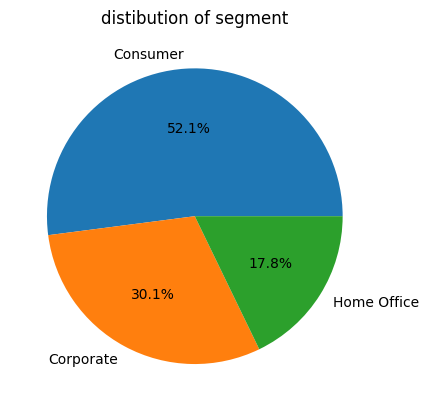

In [11]:
plt.pie(x['total customers'],labels=x['custoemr_type'],autopct='%1.1f%%')
plt.title('distibution of segment')

In [ ]:
# top distribution of segment comes from consumer i.e 52%

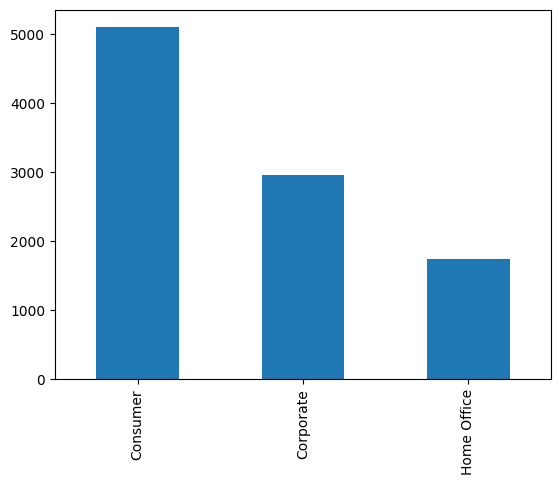

In [12]:
y=df['Segment'].value_counts().plot(kind='bar')

In [13]:
df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)

Customer Name
Sean Miller        25043.050
Tamara Chand       19052.218
Raymond Buch       15117.339
Tom Ashbrook       14595.620
Adrian Barton      14473.571
                     ...    
Mitch Gastineau       16.739
Carl Jackson          16.520
Sung Chung            14.112
Lela Donovan           5.304
Thais Sissman          4.833
Name: Sales, Length: 793, dtype: float64

<Axes: ylabel='Customer Name'>

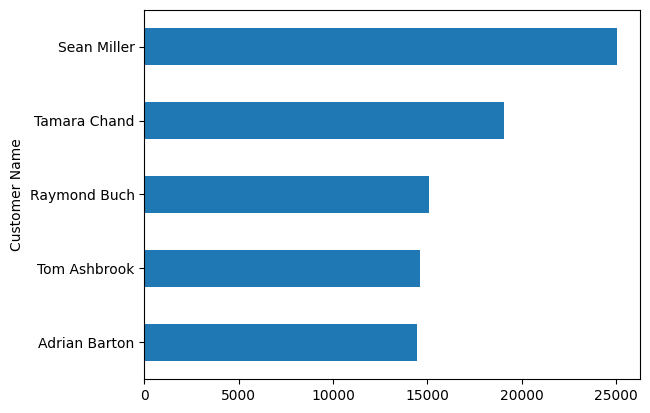

In [14]:
#top 5 customer_name purchase sales and bottom 5 customer name purchsae sales
top_5_sales = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(5)[::-1]
top_5_sales.plot(kind='barh')

In [15]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [16]:
z=df.groupby(['Customer ID','Customer Name','Segment'])['Order ID'].count().reset_index().rename(columns={'Order ID':'order_count'}).sort_values(by='order_count',ascending=False)


In [17]:
z.reset_index(drop=True)

,Customer ID,Customer Name,Segment,order_count
0,WB-21850,William Brown,Consumer,35
1,PP-18955,Paul Prost,Home Office,34
2,MA-17560,Matt Abelman,Home Office,34
3,JL-15835,John Lee,Consumer,33
4,CK-12205,Chloris Kastensmidt,Consumer,32
...,...,...,...,...
788,SC-20845,Sung Chung,Consumer,1
789,LD-16855,Lela Donovan,Corporate,1
790,JR-15700,Jocasta Rupert,Consumer,1
791,RE-19405,Ricardo Emerson,Consumer,1


In [18]:
z[z['order_count']==1]

,Customer ID,Customer Name,Segment,order_count
42,AO-10810,Anthony O'Donnell,Corporate,1
681,SC-20845,Sung Chung,Consumer,1
456,LD-16855,Lela Donovan,Corporate,1
403,JR-15700,Jocasta Rupert,Consumer,1
637,RE-19405,Ricardo Emerson,Consumer,1
145,CJ-11875,Carl Jackson,Corporate,1


Text(0.5, 1.0, 'total sales by customer')

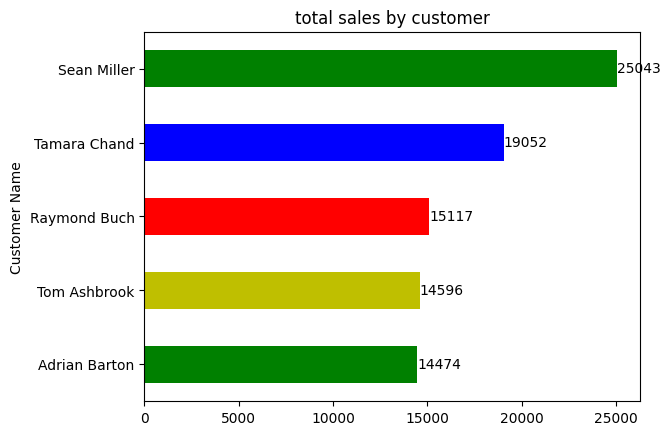

In [19]:
c=['g','y','r','b','g']
top_5_sales = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(5)[::-1]
ax=top_5_sales.plot(kind='barh',color=c)

for bars in ax.containers:
  ax.bar_label(bars, fmt='%.f')


plt.title('total sales by customer')

Text(0.5, 1.0, 'total sales by city')

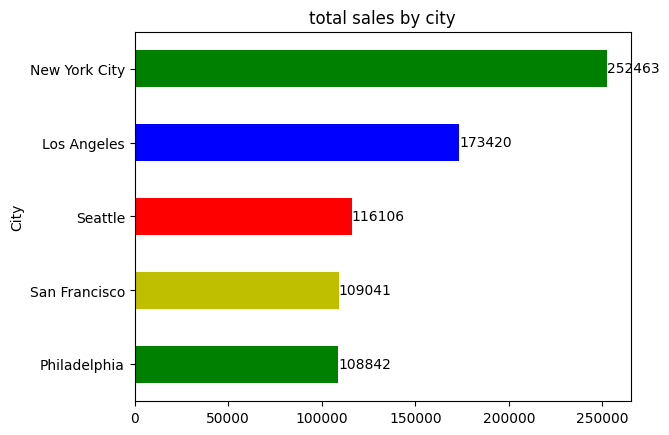

In [20]:
c=['g','y','r','b','g']
top_5_salesofcity = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(5)[::-1]
ax=top_5_salesofcity.plot(kind='barh',color=c)

# to add data label to chart use this below code
for bars in ax.containers:
  ax.bar_label(bars, fmt='%.f')
#--------------------------------------------------------
plt.title('total sales by city')

Text(0.5, 1.0, 'total sales by state')

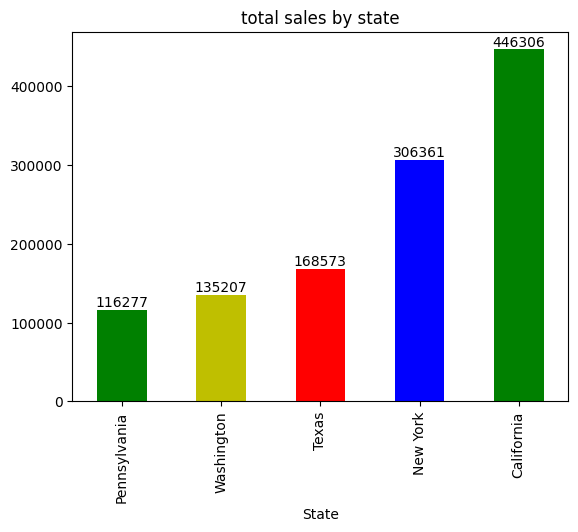

In [21]:
# top 5 state sales
c=['g','y','r','b','g']
top_5_salesofstates = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(5)[::-1]
ax=top_5_salesofstates.plot(kind='bar',color=c)

for bars in ax.containers:
  ax.bar_label(bars, fmt='%.f')


plt.title('total sales by state')

In [22]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

Text(0.5, 1.0, 'total percentage by subcategory')

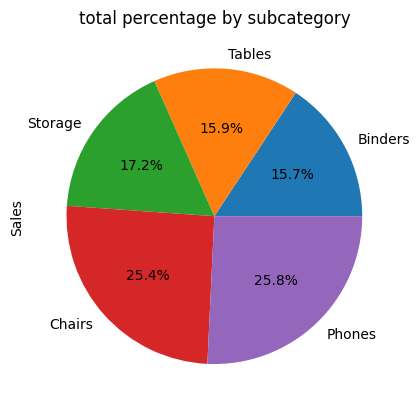

In [23]:
#percentage distribution of subcategory product here phone and chairs almost have equal distribution percentage but phone have more sales
c=['g','y','r','b','g']
top_5_salesofsubcategory = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(5)[::-1]
ax=top_5_salesofsubcategory.plot(kind='pie',autopct='%1.1f%%')

for bars in ax.containers:
  ax.bar_label(bars)


plt.title('total percentage by subcategory')

In [24]:
w = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(5)

In [25]:
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [26]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

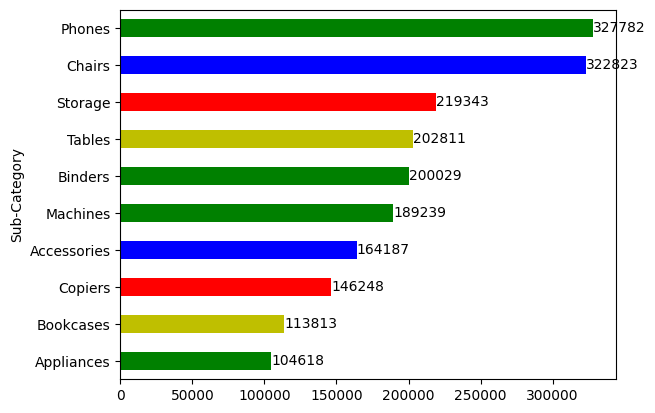

In [27]:
# top 10 subcatergory product sales
c=['g','y','r','b','g']
top_5_salesofsubcategory = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)[::-1]
ax=top_5_salesofsubcategory.plot(kind='barh',color=c)

for bars in ax.containers:
  ax.bar_label(bars)



Text(0.5, 1.0, 'total sales by region')

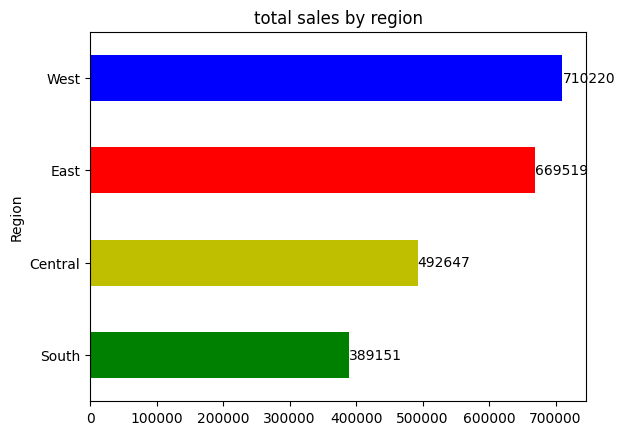

In [28]:
# top 5 region by sales
c=['g','y','r','b','g']
top_5_salesofsubcategory = df.groupby('Region')['Sales'].sum().sort_values(ascending=False).head(5)[::-1]
ax=top_5_salesofsubcategory.plot(kind='barh',color=c)

for bars in ax.containers:
  ax.bar_label(bars)

plt.title('total sales by region')

In [29]:
total_sales = df['Sales'].sum()
total_sales

2261536.7827000003

In [30]:
389151+492647+669519+710220

2261537

Text(0.5, 1.0, 'total sales by region')

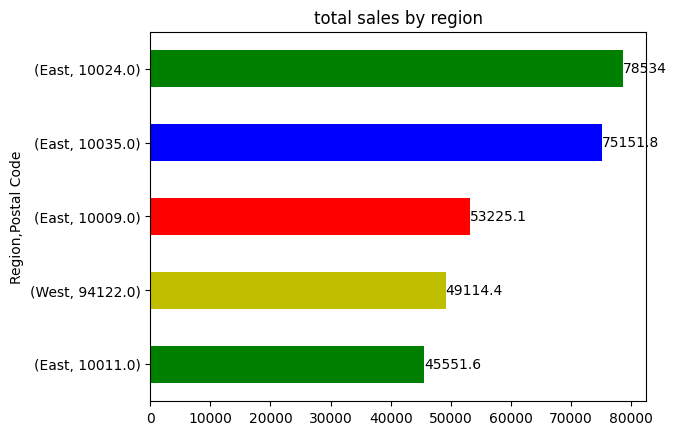

In [31]:
# top 5 each region&pincode by sales
c=['g','y','r','b','g']
top_5_salesofsubcategory = df.groupby(['Region','Postal Code'])['Sales'].sum().sort_values(ascending=False).head(5)[::-1]
ax=top_5_salesofsubcategory.plot(kind='barh',color=c)

for bars in ax.containers:
  ax.bar_label(bars)

plt.title('total sales by region')

In [32]:
top_10_sales_of_postal_code_region = df.groupby(['Region', 'Postal Code'])['Sales'].sum().sort_values(ascending=False).head(10)
top_10_sales_of_postal_code_region

Region  Postal Code
East    10024.0        78534.044
        10035.0        75151.829
        10009.0        53225.076
West    94122.0        49114.375
East    10011.0        45551.598
West    98105.0        41838.008
        98115.0        41160.908
East    19134.0        39390.293
South   32216.0        39133.328
West    90049.0        37889.924
Name: Sales, dtype: float64

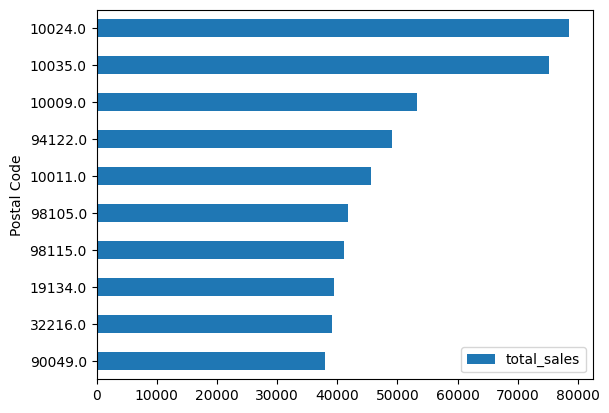

In [33]:
# top 10 pincode by sales
top_10_sales_of_postal_code_region = df.groupby(['Region', 'Postal Code'])['Sales'].sum().sort_values(ascending=False).head(10)
top_10_sales_of_postal_code_region = top_10_sales_of_postal_code_region.reset_index().rename(columns={'Sales': 'total_sales'})

top_10_sales_of_postal_code_region.plot(kind='barh', x='Postal Code', y='total_sales')

plt.gca().invert_yaxis()  # Invert the y-axis for descending order

plt.show()

In [34]:
 df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [35]:
df2=df.copy()

In [36]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96


In [37]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [38]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [39]:
# to convert object to datetime format format='%d/%m/%Y' is used here to tell datetime library that over order_date column having first date-month-year fromat
# so using datetime it will covert to year-month-date
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

In [40]:
#df['date'] = df['date'].dt.strftime('%Y/%m/%d')
# is used to convert datetime to object data type

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   object        
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [42]:
df['Order Date']

0      2017-11-08
1      2017-11-08
2      2017-06-12
3      2016-10-11
4      2016-10-11
          ...    
9795   2017-05-21
9796   2016-01-12
9797   2016-01-12
9798   2016-01-12
9799   2016-01-12
Name: Order Date, Length: 9800, dtype: datetime64[ns]

<Axes: xlabel='Order Date'>

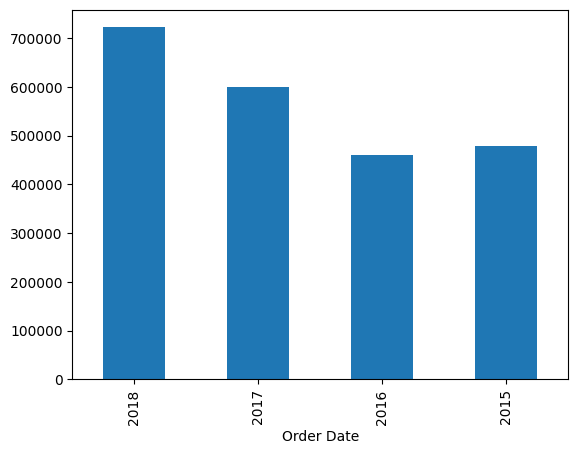

In [43]:
#total year sales where 2018 have high sales and 2016 have low sales
yearly_sales=df.groupby(df['Order Date'].dt.year)['Sales'].sum()[::-1]
yearly_sales.plot(kind='bar')

In [48]:
#convert month number to month name
df['MONTH_NAME'] = df['Order Date'].dt.strftime('%B')

In [49]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,MONTH_NAME
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,November
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,November
2,3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,June
3,4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,October
4,5,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,October


In [52]:
 # total month sales for all year
 month_sales=df.groupby(df['MONTH_NAME'])['Sales'].sum().sort_values(ascending=False)
 month_sales

MONTH_NAME
November     350161.7110
December     321480.1695
September    300103.4117
October      199496.2947
March        197573.5872
August       157315.9270
May          154086.7237
June         145837.5233
July         145535.6890
April        136283.0006
January       94291.6296
February      59371.1154
Name: Sales, dtype: float64

Text(0, 0.5, 'month_name')

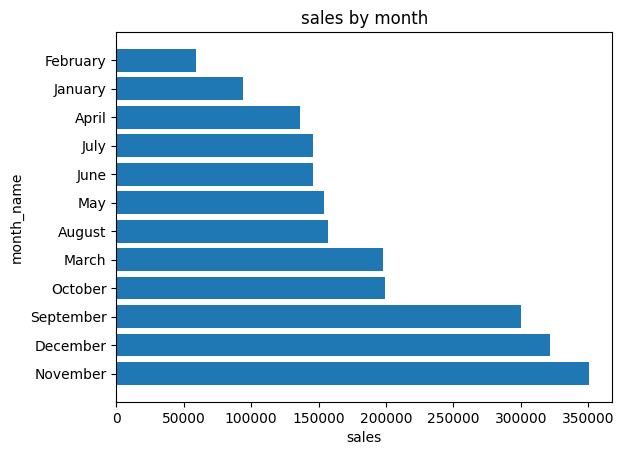

In [61]:
#above sales graph is plotted below
plt.barh(month_sales.index, month_sales.values)
plt.title('sales by month')
plt.xlabel('sales')
plt.ylabel('month_name')

In [62]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'MONTH_NAME'],
      dtype='object')

In [74]:
#total order get in year we see 2018 have high order count while 2015 have low order count
total_order_count_year_wise=df.groupby(df['Order Date'].dt.year)['Order ID'].count().sort_values(ascending=False)

In [75]:
total_order_count_year_wise

Order Date
2018    3258
2017    2534
2016    2055
2015    1953
Name: Order ID, dtype: int64

In [89]:
total_order_Sales_year_wise=df.groupby(df['Order Date'].dt.year)['Sales'].sum()

In [90]:

total_order_Sales_year_wise

Order Date
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: Sales, dtype: float64

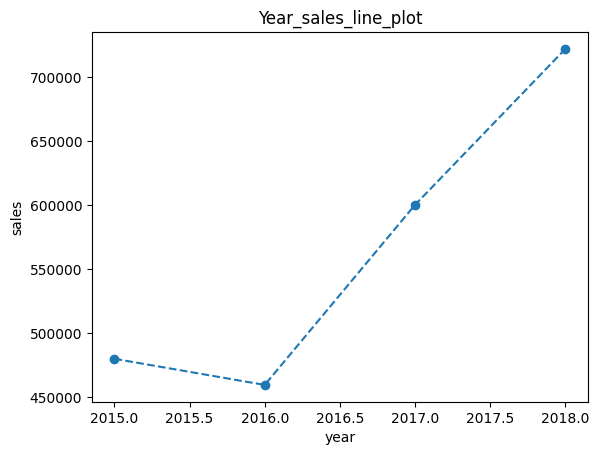

In [91]:
#total sales by each year plotted below using lineplot
ax=total_order_Sales_year_wise.plot(kind='line',marker='o',linestyle='--')
plt.title('Year_sales_line_plot')
plt.xlabel('year')
plt.ylabel('sales')


In [95]:
total_order_sales_month_wise=df.groupby(df['Order Date'].dt.month)['Sales'].sum()

Text(0, 0.5, 'sales')

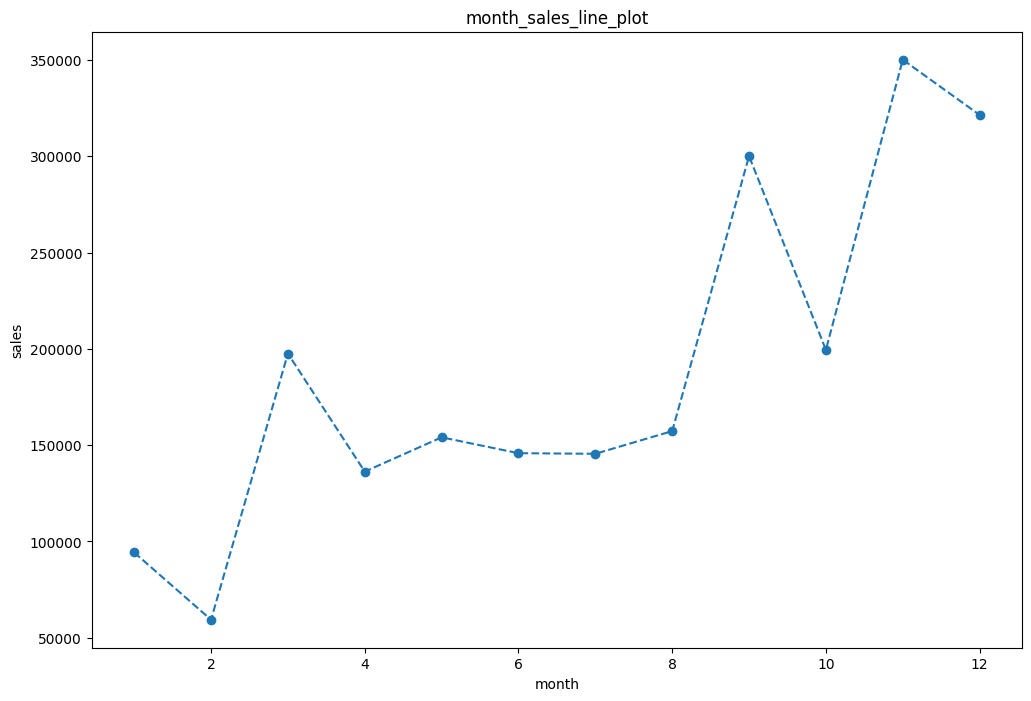

In [106]:
plt.figure(figsize=(12,8))
ax=total_order_sales_month_wise.plot(kind='line',marker='o',linestyle='--')
plt.title('month_sales_line_plot')
plt.xlabel('month')
plt.ylabel('sales')


In [107]:
df['Year']=df['Order Date'].dt.year

In [108]:
df['month']=df['Order Date'].dt.month

In [ ]:
df.head()

In [118]:
#line plot show for month for each year sales but it is too compllicated to see value also overlap is seen so by normal matplotlib library
Year_month_Sales=df.groupby(['Year','month'])['Sales'].sum().unstack()

<Axes: xlabel='Year'>

<Figure size 1500x2000 with 0 Axes>

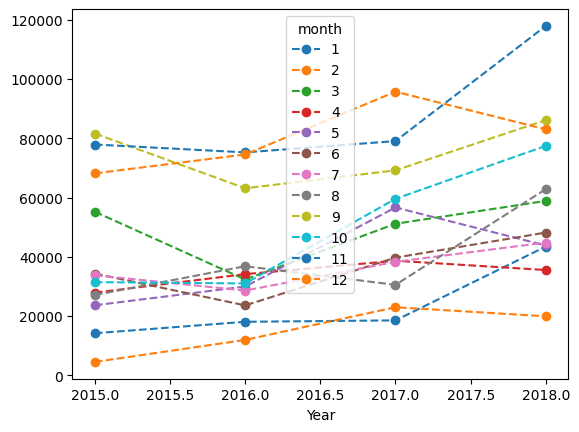

In [123]:
plt.figure(figsize=(15,20))
Year_month_Sales.plot(kind='line',marker='o',linestyle='--')

In [130]:
# to see better graph get idea about month sales for each year we import plotly library to get better visualization
import plotly.express as px

Year_month_Sales = df.groupby(['Year', 'month'])['Sales'].sum().reset_index()

fig = px.line(Year_month_Sales, x='month', y='Sales', color='Year', markers=True, line_dash='Year', title='Yearly Sales')
fig.show()

In [128]:
#short form how value are calculated in this plotly graph for blue line fpr year 2015 and month 1 is sales is14.20 k
df[(df['Year']==2015)&(df['month']==1)]['Sales'].sum()


68167.0585

In [132]:
#short form how value are calculated in this plotly graph for blue line fpr year 2015 and month 12 is sales is 68.16 k
df[(df['Year']==2015)&(df['month']==12)]['Sales'].sum()

68167.0585

In [ ]:
# end you can add more analysis to get  detail data

In [ ]:
# i have also done similar project on powerbi on github